# Ajuste de curvas

A regressão linear permite encontrar a melhor reta que se ajusta a um conjunto de pontos fornecidos.

Veremos agora como ajustar o conjunto de pontos no caso de modelo não-lineares.

* Linearização de modelos não-lineares
 * Linearização da equação de potência
 * Linearização da equação y = ax/(b+x)

## Linearização da equação de potência

De forma análoga, podemos linearizar a equação de potência simples:

\begin{equation}
y = \alpha x^\beta
\end{equation}

aplicando o logaritmico em ambos os lados:

\begin{equation}
ln(y) = ln(\alpha) +  \beta\ln(x)
\end{equation}

que também apresenta a equação de uma reta:

\begin{equation}
Y = \theta_0 +  \theta_1X
\end{equation}

onde $Y = ln(y)$, $\theta_0 = \ln(\alpha)$, $\theta_1 = \beta$ e $X = \ln(x)$


## Exemplo

[CHAPRA, Métodos numéricos aplicados com MATLAB]

Ajuste a equação de potência para os dados abaixo:

\begin{array}{|c|c|} \hline
x_i & y_i \\ \hline
 10 & 25  \\
 20 & 70  \\
 30 & 380  \\
 40 & 550 \\ 
 50 & 610 \\
 60 & 1220 \\
 70 & 830 \\
 80 & 1450 \\ \hline
 \end{array}

d:\system\conda_envs\cn\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     109.5
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           4.47e-05
Time:                        21:31:58   Log-Likelihood:                 4.8047
No. Observations:                   8   AIC:                            -5.609
Df Residuals:                       6   BIC:                            -5.451
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5620      0.304     -1.851      0.1

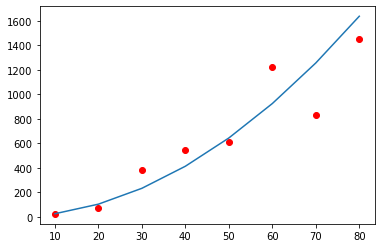

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

dados = [ [10, 20, 30, 40, 50, 60, 70, 80], [25, 70, 380, 550, 610, 1220, 830, 1450]]
df = pd.DataFrame({'x': dados[0], 'y': dados[1]})

X = df['x']
Y = df['y']

Xls = np.log10(X)
Xls = sm.add_constant(Xls)
Yls = np.log10(Y)

modelo = sm.OLS(Yls, Xls).fit()

print(modelo.summary())
print('\n',modelo.params)

alpha = 10**modelo.params.const
beta = modelo.params.x

Ym = alpha*X**beta
plt.plot(X, Ym)
plt.scatter(X, Y, c='r')

## Linearização da equação y = ax/(b+x)

Outro exemplo de modelo não-linear é a equação:

\begin{equation}
y = \alpha \dfrac{x}{\beta + x}
\end{equation}

Neste caso, podemos inverter os termos e obter:

\begin{equation}
\dfrac{1}{y} = \dfrac{1}{\alpha} + \dfrac{\beta}{\alpha x}
\end{equation}

que corresponde à equação linear:

\begin{equation}
Y = \theta_0 + \theta_1X
\end{equation}

onde:

\begin{itemize}
\item $Y = \dfrac{1}{y}$
\item $\theta_0 = \dfrac{1}{\alpha}$
\item $\theta_1 = \dfrac{\beta}{\alpha}$
\item $X = \dfrac{1}{x}$
\end{itemize}


## Exemplo: Equação de Michaelis-Menten

A equação de Michaelis-Menten é utilizada para descrever boa parte da cinética enzimática, ramo que estuda as reações químicas catalisadas por enzimas.

Neste caso a velocidade inicial de catálise ($V_0$) depende da concentração de substrato ($[S]$).
Foi observado que a relação entre $V_0$ e $[S]$ é composto de 2 fases: Uma cinética de primeira ordem, onde a velocidade depende da concentração do substrato, e uma cinética de ordem zero, onde a velocidade não depende da concentração.
Esta segunda fase é causada pela saturação e temos que $V_0$ não pode ser superior a um dado valor máximo $V_{max}$.

A equação de Michaelis-Menten é matematicamente formulada como:

\begin{equation}
V_0 = \dfrac{V_{max} [S]}{K_m + [S]}
\end{equation}

onde:

\begin{itemize}
\item $V_0$ é a velocidade inicial 
\item $[S]$ é a concentração de um substrato
\item $V_{max}$ é a velocidade máxima da velocidade inicial, 
\item $K_m$ é a concentração de substrato que faz com que tenhamos metade da velocidade máxima
\end{itemize}

![michaelis-menten](./figuras/ajuste-curvas-michaelis_menten.png)

A linearização pode ser obtida fazendo a transformação (Lineweaver-Burk):

\begin{equation}
\dfrac{1}{V_0} = \dfrac{K_m}{V_{max}}\dfrac{1}{[S]} + \dfrac{1}{V_{max}}
\end{equation}

que corresponde à equação linear:

\begin{equation}
Y = \theta_1X + \theta_0
\end{equation}

onde:

\begin{itemize}
\item $Y = \frac{1}{V_0}$
\item $\theta_0 = \frac{1}{V_{max}}$
\item $\theta_1 = \frac{K_m}{V_{max}}$
\item $X = \frac{1}{[S]}$
\end{itemize}

e obtemos a relação:

$V_{max} = 1/\theta_0$

e

$K_m = V_{max}\cdot \theta_1$

Considere os seguintes dados de concentração e velocidade inicial:

\begin{array}{|c|c|} \hline 
[S] (\mu mol) & V_0 (\mu mol/min) \\ \hline
500 & 0,25 \\ 
50 & 0,25 \\ 
5,0 & 0,25 \\ 
0,5 & 0,20 \\ 
0,05 & 0,071 \\ 
0,005 & 0,0096 \\ \hline
\end{array}

                            OLS Regression Results                            
Dep. Variable:                     V0   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.287e+06
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.15e-12
Time:                        21:36:17   Log-Likelihood:                 9.6416
No. Observations:                   6   AIC:                            -15.28
Df Residuals:                       4   BIC:                            -15.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9890      0.027    146.743      0.0

d:\system\conda_envs\cn\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


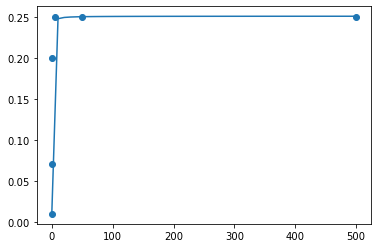

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

dados = [[ 500, 50, 5, 0.5, 0.05, 0.005],  [0.25, 0.25, 0.25, 0.2, 0.071, 0.0096]]
df = pd.DataFrame({'S': dados[0], 'V0': dados[1]})

S = df['S']
V0 = df['V0']

Y = 1/V0
X = 1/S
X = sm.add_constant(X)

modelo = sm.OLS(Y,X).fit()

print(modelo.summary())
print(modelo.params)

Vmax = 1/modelo.params[0]
Km = modelo.params[1]*Vmax

print(f'Vmax = {Vmax} e Km = {Km}')

plt.scatter(S, V0)
SS = np.linspace(0.005, 500)
V = Vmax*SS/(Km + SS)
plt.plot(SS, V)